In [1]:
import yfinance as yf
import pandas as pd

# Define the stock and time period
stock = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch the data
data = yf.download(stock, start=start_date, end=end_date)

# Display the first few rows
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200


In [2]:
# Drop rows with missing values
data = data.dropna()

# Display the first few rows after cleaning
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960449,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200


In [3]:
# Calculate moving averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculate volatility
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values created by rolling calculations
data = data.dropna()

# Display the first few rows with new features
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility
Date,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Close', 'SMA_20', 'SMA_50', 'Volatility']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the first few rows with cluster labels
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster
Date,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2


In [5]:
# Example strategy: Buy when in cluster 0, sell when in cluster 1, hold otherwise
data['Signal'] = 0  # Default to hold
data.loc[data['Cluster'] == 0, 'Signal'] = 1  # Buy
data.loc[data['Cluster'] == 1, 'Signal'] = -1  # Sell

# Display the first few rows with signals
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster,Signal
Date,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2,0
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2,0
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2,0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2,0
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2,0


In [6]:
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1

# Display the first few rows with returns
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster,Signal,Returns,Strategy_Returns,Cumulative_Market_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2,0,NaN,NaN,NaN,NaN
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2,0,-0.128647,-0.0,-0.128647,0.0
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2,0,0.043970,0.0,-0.090333,0.0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2,0,-0.024480,-0.0,-0.112602,0.0
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2,0,-0.007662,-0.0,-0.119401,0.0


In [7]:
# Calculate returns
data['Returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1

# Display the first few rows with returns
data.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Volatility,Cluster,Signal,Returns,Strategy_Returns,Cumulative_Market_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,,,
2020-03-13,66.222504,69.980003,63.237499,69.492500,67.684196,370732000,73.158374,76.45170,5.152532,2,0,NaN,NaN,NaN,NaN
2020-03-16,60.487499,64.769997,60.000000,60.552502,58.976845,322423600,72.124124,76.16100,5.509157,2,0,-0.128647,-0.0,-0.128647,0.0
2020-03-17,61.877499,64.402496,59.599998,63.215000,61.570057,324056000,71.297374,75.93815,5.545096,2,0,0.043970,0.0,-0.090333,0.0
2020-03-18,59.942501,62.500000,59.279999,61.667500,60.062832,300233600,70.335499,75.67250,5.458637,2,0,-0.024480,-0.0,-0.112602,0.0
2020-03-19,61.847500,63.209999,60.652500,61.195000,59.602615,271857200,69.391499,75.40445,5.316339,2,0,-0.007662,-0.0,-0.119401,0.0


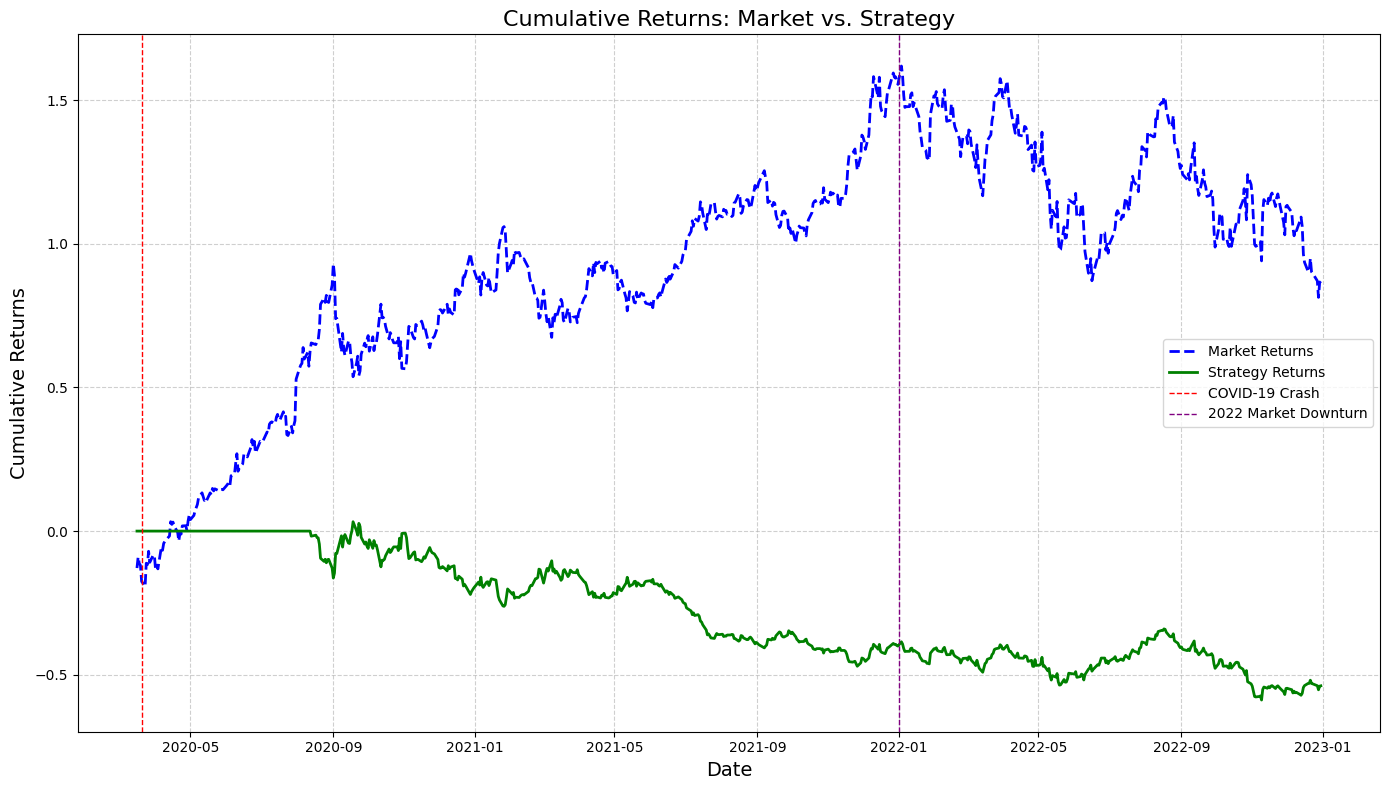

Final Market Cumulative Return: 0.869698055260558
Final Strategy Cumulative Return: -0.5387043805919733


In [9]:
import matplotlib.pyplot as plt

# Plot cumulative returns
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Cumulative_Market_Returns'], label='Market Returns', color='blue', linestyle='--', linewidth=2)
plt.plot(data.index, data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='green', linestyle='-', linewidth=2)

# Enhancing the graph
plt.title('Cumulative Returns: Market vs. Strategy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add vertical lines for significant events (optional)
plt.axvline(pd.to_datetime('2020-03-20'), color='red', linestyle='--', linewidth=1, label='COVID-19 Crash')
plt.axvline(pd.to_datetime('2022-01-01'), color='purple', linestyle='--', linewidth=1, label='2022 Market Downturn')

plt.legend()
plt.tight_layout()
plt.show()

# Print final cumulative returns
print("Final Market Cumulative Return:", data['Cumulative_Market_Returns'].iloc[-1])
print("Final Strategy Cumulative Return:", data['Cumulative_Strategy_Returns'].iloc[-1])


In [15]:
pip install ta yfinance


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


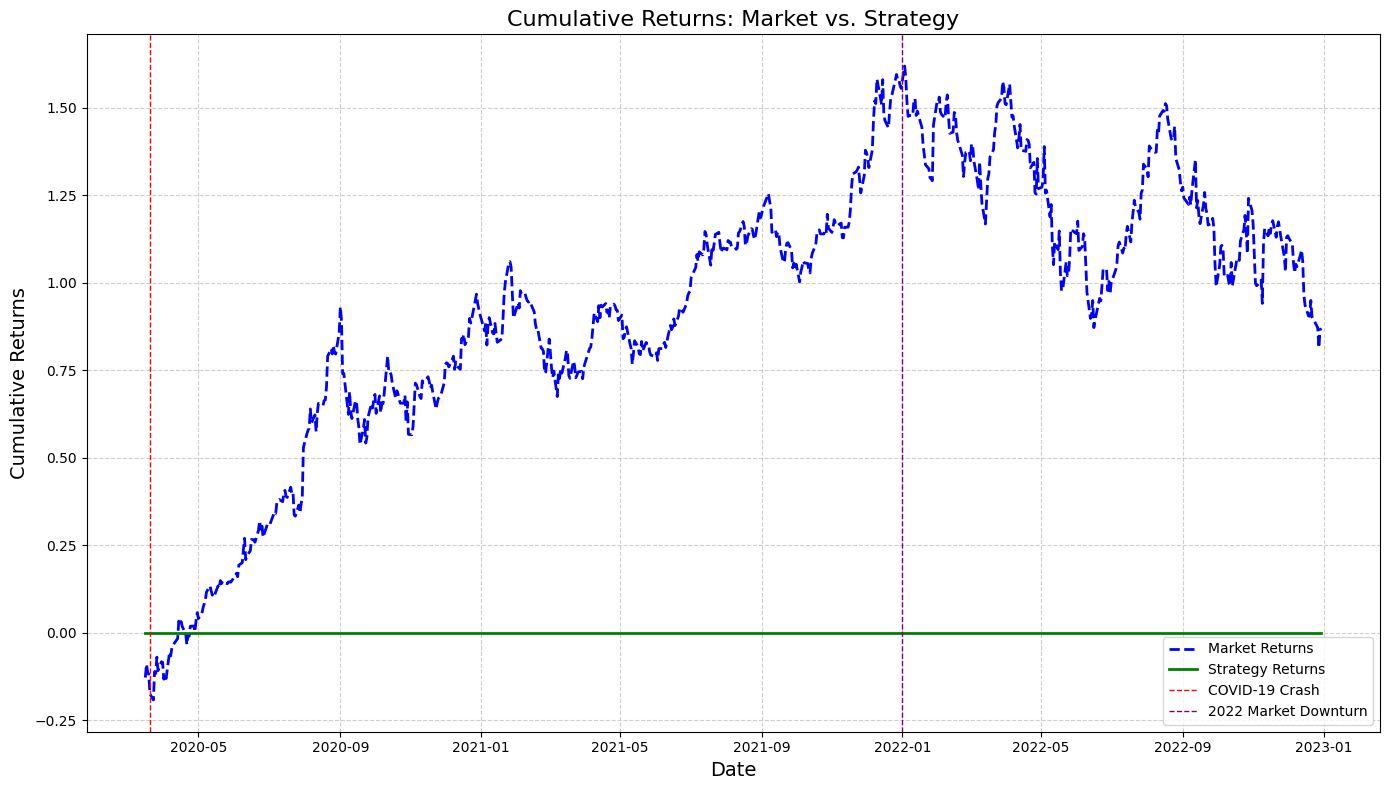

Final Market Cumulative Return: 0.869698055260558
Final Strategy Cumulative Return: 0.0


In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from ta.momentum import RSIIndicator, StochasticOscillator
from ta.trend import MACD
from ta.volatility import BollingerBands

# Define the stock and time period
stock = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch the data
data = yf.download(stock, start=start_date, end=end_date)
data = data.dropna()

# Calculate technical indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# RSI
rsi = RSIIndicator(data['Close'], window=14)
data['RSI'] = rsi.rsi()

# Bollinger Bands
bollinger = BollingerBands(data['Close'], window=20, window_dev=2)
data['Bollinger_High'] = bollinger.bollinger_hband()
data['Bollinger_Low'] = bollinger.bollinger_lband()

# MACD
macd = MACD(data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()

# Stochastic Oscillator
stochastic = StochasticOscillator(data['High'], data['Low'], data['Close'])
data['Stoch'] = stochastic.stoch()
data['Stoch_Signal'] = stochastic.stoch_signal()

data = data.dropna()

# Select features for clustering
features = ['Close', 'SMA_20', 'SMA_50', 'Volatility', 'RSI', 'Bollinger_High', 'Bollinger_Low', 'MACD', 'MACD_Signal', 'Stoch', 'Stoch_Signal']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Improved strategy
def get_signal(row):
    if row['Cluster'] == 0 and row['RSI'] < 30 and row['Close'] < row['Bollinger_Low'] and row['MACD'] > row['MACD_Signal'] and row['Stoch'] < row['Stoch_Signal']:
        return 1  # Buy signal
    elif row['Cluster'] == 1 and row['RSI'] > 70 and row['Close'] > row['Bollinger_High'] and row['MACD'] < row['MACD_Signal'] and row['Stoch'] > row['Stoch_Signal']:
        return -1  # Sell signal
    else:
        return 0  # Hold signal

data['Signal'] = data.apply(get_signal, axis=1)

# Calculate returns
data['Returns'] = data['Close'].pct_change()
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['Cumulative_Market_Returns'], label='Market Returns', color='blue', linestyle='--', linewidth=2)
plt.plot(data.index, data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='green', linestyle='-', linewidth=2)

# Enhancing the graph
plt.title('Cumulative Returns: Market vs. Strategy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add vertical lines for significant events (optional)
plt.axvline(pd.to_datetime('2020-03-20'), color='red', linestyle='--', linewidth=1, label='COVID-19 Crash')
plt.axvline(pd.to_datetime('2022-01-01'), color='purple', linestyle='--', linewidth=1, label='2022 Market Downturn')

plt.legend()
plt.tight_layout()
plt.show()

# Print final cumulative returns
print("Final Market Cumulative Return:", data['Cumulative_Market_Returns'].iloc[-1])
print("Final Strategy Cumulative Return:", data['Cumulative_Strategy_Returns'].iloc[-1])


In [17]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # for cluster evaluation

# Function for backtesting and performance calculation
def backtest_strategy(data, strategy_func, features, cost=0.001):
  """
  Backtests a trading strategy and calculates performance metrics.

  Args:
      data (pd.DataFrame): DataFrame containing stock data and features.
      strategy_func (function): Function that takes a DataFrame and generates buy/sell signals.
      features (list): List of feature names used for clustering.
      cost (float, optional): Transaction cost (commission, spread) as a percentage. Defaults to 0.001.

  Returns:
      pd.DataFrame: DataFrame with additional columns for signals, returns, and cumulative returns.
  """

  data['Signal'] = strategy_func(data[features])
  data['Signal'] = data['Signal'].shift(1)  # Shift signal to avoid lookahead bias

  # Calculate gross returns (without transaction costs)
  data['Returns'] = data['Close'].pct_change()

  # Apply transaction costs
  data['Transaction_Cost'] = data['Signal'].abs() * cost * data['Close']
  data['Net_Returns'] = data['Returns'] - data['Transaction_Cost']

  # Calculate cumulative returns
  data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod() - 1
  data['Cumulative_Strategy_Returns'] = (1 + data['Net_Returns']).cumprod() - 1

  # Calculate performance metrics
  # (Sharpe ratio, etc. can be added here)

  return data

# Define the stock and time period
stock = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch the data
data = yf.download(stock, start=start_date, end=end_date)

# Drop rows with missing values (might need adjustment based on strategy)
data = data.dropna()

# Feature engineering (replace with your domain knowledge and feature selection)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Define function for strategy logic (replace with your improved signal generation)
def generate_signals(data, distance_threshold=0.5):
  """
  Generates buy/sell signals based on cluster membership and distance to centroid.

  Args:
      data (pd.DataFrame): DataFrame with features and cluster labels.
      distance_threshold (float, optional): Threshold for distance to centroid for buy/sell signals. Defaults to 0.5.

  Returns:
      pd.Series: Series containing buy (1), sell (-1), or hold (0) signals.
  """

  signals = data['Cluster'].copy()
  signals[data['Cluster_Distance'] > distance_threshold] = 0  # Hold if far from centroid
  signals[signals == 1] = -1  # Sell in cluster 1
  signals[signals == 0] = 1   # Buy in cluster 0 (modify based on strategy)
  return signals

# Standardize features before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# KMeans clustering with evaluation (experiment with different k)
k_range = range(2, 6)  # Experiment with different numbers of clusters
best_k = None
best_score = -float('inf')
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(scaled_data)
  data['Cluster'] = kmeans.predict(scaled_data)
  data['Cluster_Distance'] = np.linalg.norm(scaled_data - kmeans.cluster_


SyntaxError: incomplete input (<ipython-input-17-f3af4e58768a>, line 88)